# Introduction
Since the start of the Covid-19 pandemic, talking about viral infections and ways to prevent them (such as vaccinations) has taken a big part of the public spotlight. In this project, we have data concerning the demographics and characteristics of 24000 people from the US, as well as the information on whether they took the seasonal flu vaccine and/or bird-flu vaccine. The project's goal is to create a classification model that will predict whether a future patient will take the seasonal flu/ bird flu vaccine. With that information, our policymakers can make better public health measures to improve the vaccination rates and therefore save lives.    

# Loading the data

- Training Features: These are the input variables that your model will use to predict the probability that people received H1N1 flu and seasonal flu vaccines. There are 35 feature columns in total, each a response to a survey question. These questions cover several different topics, such as whether people observed safe behavioral practices, their opinions about the diseases and the vaccines, and their demographics. Check out the problem description page for more information.
- Training Labels: These are the labels corresponding to the observations in the training features. There are two target variables: h1n1_vaccine and seasonal_vaccine. Both are binary variables, with 1 indicating that a person received the respective flu vaccine and 0 indicating that a person did not receive the respective flu vaccine. Note that this is what is known as a "multilabel" modeling task.
- Test Features: These are the features for observations that you will use to generate the submission predictions after training a model. We don't give you the labels for these samples—it's up to you to generate them.
- Submission Format: This file serves as an example for how to format your submission. It contains the index and columns for our submission prediction. The two target variable columns are filled with 0.5 and 0.7 as an example. Your submission to the leaderboard must be in this exact format (with different prediction values) in order to be scored successfully!

Let's start by importing the libraries that we will need to load and explore the data.

In [13]:
# Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Loading data containing features
df_features = pd.read_csv(r"C:\Users\jvrdo\Downloads\training_set_features.csv")

# First look into feature dataframe
df_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [3]:
# Loading data containing target variables
df_target = pd.read_csv(r"C:\Users\jvrdo\Downloads\training_set_labels.csv")

# First look into target variables
df_target.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


# Exploratory data analysis and data cleaning


In [4]:
# Joining feature and target dataframe
df = pd.merge(df_features, df_target, how="inner")

# Checking the result
df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [5]:
# Checking column types
df.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [6]:
# Checking for missing values (NaNs)
df.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [7]:
# Basic descriptive statistics (just to check if some max values in our ordinal scales are off)
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


For correlation between features and variable we should use Cramer's V, or Theil's u

In [8]:
def histograms_numeric_columns(df, numerical_columns):
    '''
    Takes df, numerical columns as list
    Returns a group of histagrams
    '''
    f = pd.melt(df, value_vars=numerical_columns) 
    g = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
    g = g.map(sns.distplot, 'value')
    return g

def heatmap_numeric_w_dependent_variable(df, dependent_variable):
    '''
    Takes df, a dependant variable as str
    Returns a heatmap of all independent variables' correlations with dependent variable 
    '''
    plt.figure(figsize=(8, 10))
    g = sns.heatmap(df.corr()[[dependent_variable]].sort_values(by=dependent_variable), 
                    annot=True, 
                    cmap='coolwarm', 
                    vmin=-1,
                    vmax=1) 
    return g

def cramers_v(x, y):
    '''
    Returns cramers_v for 2 categorical features
    '''
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return round(np.sqrt(phi2corr/min((kcorr-1),(rcorr-1))),3)

def heatmap_categorical_columns_w_dependant_categorical(df, dependent_variable, columns):
    '''
    Takes df, a dependant variable as str
    Returns a heatmap of catecorical columns cramers_v with dependent variable 
    '''
    plt.figure(figsize=(8, 10))
    corrM = [cramers_v(df[dependent_variable], df[column]) for column in columns]
    corr = pd.DataFrame(corrM, index=columns, columns=[dependent_variable])
    ax = sns.heatmap(corr,
            annot=True,
            cmap='coolwarm', 
            vmin=-1,
            vmax=1,
           )
    ax.set_title("Cramer V Correlation between Variables")
    return ax

In [10]:
categorical_cols = list(set(df.columns.values.tolist()))
len(categorical_cols)

38

<ipython-input-8-8cba8ea486df>:36: RuntimeWarning: divide by zero encountered in double_scalars
  return round(np.sqrt(phi2corr/min((kcorr-1),(rcorr-1))),3)


<AxesSubplot:title={'center':'Cramer V Correlation between Variables'}>

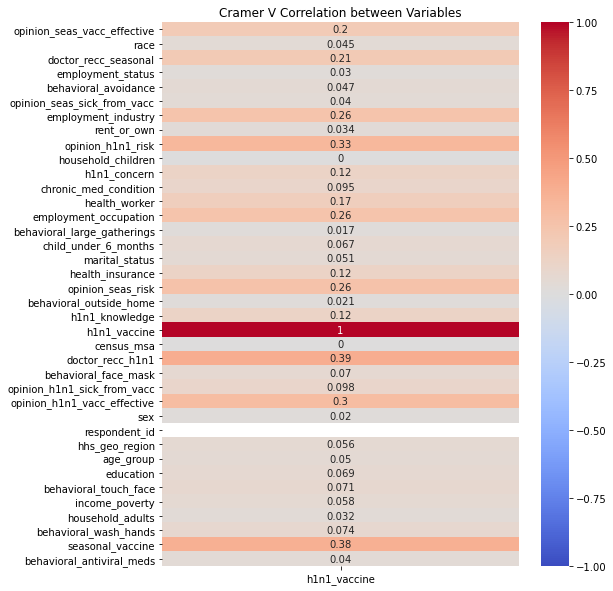

In [14]:
heatmap_categorical_columns_w_dependant_categorical(df, 'h1n1_vaccine' , categorical_cols)

From the heatmap, we can see that h1n1 vaccine and the seasonal vaccine have a weak positive correlation of 0.38, 
which suggests some dependancy between target variables. Also there is correlation between taking h1n1 vaccine and doctor's reccomendation to take the vaccine, and with the opinions of vaccine efficacy and the risk of getting h1n1 flu.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

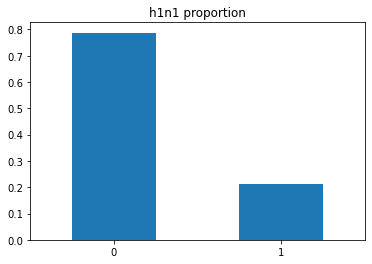

In [15]:
# Plotting the proportion of people taking h1n1 vaccine
n_obs = df.shape[0]

h1n1_prop = df["h1n1_vaccine"].value_counts().div(n_obs).plot(kind="bar")
h1n1_prop.set_title("h1n1 proportion")
plt.xticks(rotation = 0)


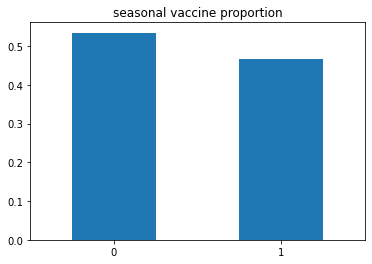

In [16]:
# Plotting the proportion of people taking the seasonal vaccine
seas_prop = df["seasonal_vaccine"].value_counts().div(n_obs).plot(kind="bar")
seas_prop.set_title("seasonal vaccine proportion")
plt.xticks(rotation = 0)
plt.show()

From the two graphs above, we can discern how the seasonal flu vaccine has balanced classes, 
whereas the H1N1 flu vaccine target has imbalanced classes.

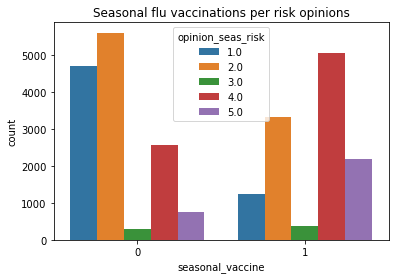

In [17]:
# From the heatmap, we saw a 0.39 correlation between seasonal flu shot and the opinion about seasonal flu risk.
# We will further explore this relationship with a barplot
x= df["seasonal_vaccine"]
h = df["opinion_seas_risk"]
seas_risk = sns.countplot(x=x, data= df, hue=h)
seas_risk.set_title("Seasonal flu vaccinations per risk opinions")
plt.show()

From the figure above, we can see how people who considered to be at a higher risk for getting sick with the flu,
where logically also more likely to get vaccinated

Text(0.5, 1.0, 'Seasonal flu vaccinations per age group')

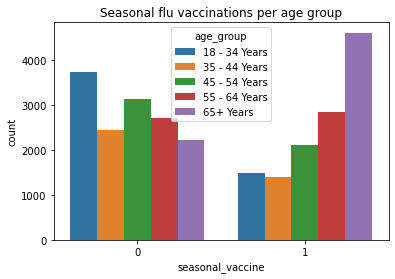

In [18]:
# Next we will check whether there is a relationship between age groups and vaccination rates
age= df["age_group"].sort_values()

flu_age = sns.countplot(x="seasonal_vaccine", data=df, hue=age)
flu_age.set_title("Seasonal flu vaccinations per age group")



Text(0.5, 1.0, 'h1n1 vaccinations per age group')

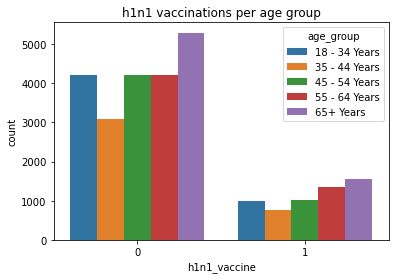

In [19]:
h1n1_age = sns.countplot(x="h1n1_vaccine", data=df, hue=age)
h1n1_age.set_title("h1n1 vaccinations per age group")


We can see how the age differences are much less pronunced in h1n1 vaccination rates.

Text(0.5, 1.0, 'Different vaccination rates per efficacy opinions')

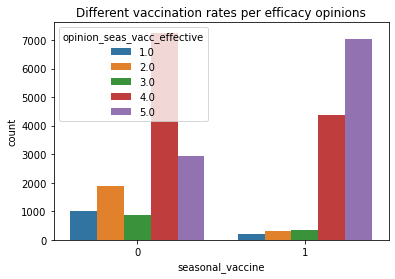

In [20]:
# Further, we will look into the relationship between opinion about vaccine efficacy and seasonal flu vaccination rates
op = df["opinion_seas_vacc_effective"].sort_values()
flu_effect = sns.countplot(x="seasonal_vaccine", data=df, hue=op)
flu_effect.set_title("Different vaccination rates per efficacy opinions")

# Transforming and modelling, creating pipeline

In [21]:
# Checking which features are categorical, and still not coded
print(df.dtypes)

df.drop("respondent_id", inplace=True, axis=1)

print(df.columns)

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [22]:
# Picking out uncoded categorical variables        
df_categ = ["age_group", "education", "race", "sex", "income_poverty", "marital_status", "rent_or_own", "employment_status", 
               "hhs_geo_region", "census_msa"]

# Picking out columns for imputation with the most frequent values
cols_most_fq = ['h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
        'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
        'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']

# Picking out coluns for imputation with 0
cols_zero = ['health_insurance', 'chronic_med_condition', 'child_under_6_months', 'health_worker']

In [23]:
# Importing modules
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
# Setting random seed
RANDOM_SEED = 7

# Initiating encoder, imputer, model
ohe = OneHotEncoder(handle_unknown='ignore')
imp_mfq = SimpleImputer(strategy='most_frequent')
con_imp = SimpleImputer(strategy="constant", fill_value="MISSING")
zero_imp = SimpleImputer(strategy='constant', fill_value=0)
clf = MultiOutputClassifier(estimator = LogisticRegression(max_iter=500))
rlf = RandomForestClassifier(random_state=0)

# Creating categorical transformer pipeline
categorical_transformer = Pipeline(
    [
        ('imputer_cat', con_imp),
        ('onehot', ohe)
    ]
)

# Creating first numeric transformer pipeline
numeric_transformer_1 = Pipeline(
    [    
        ('standard_scaler', StandardScaler()),
        ('imputer_fq', imp_mfq)
    ]
)

# Creating second numeric transformer pipeline
numeric_transformer_2 = Pipeline(
    [
        ('imputer_zero', zero_imp)
    ]
)

# Creating column transformer
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, 
          df_categ),
        ('numerical_1', numeric_transformer_1, cols_most_fq),
        ('numerical_2', numeric_transformer_2, cols_zero)
    ],
    remainder = 'drop'
)

In [30]:
# Initiating full pipeline (transformer + algorithm)
pipeline = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('clf', clf)
    ]
)

In [31]:
# Train test splitting the data, using the stratify argument to enforce even splits
# (because the target variables were somewhat imbalanced)
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
X = df.drop(["h1n1_vaccine","seasonal_vaccine"], axis=1)
y= df[["h1n1_vaccine","seasonal_vaccine"]]
X_train, X_eval, y_train, y_eval = train_test_split(
    X,
    y,
    test_size=0.35,
    shuffle=True,
    stratify= y,
    random_state=RANDOM_SEED
)

In [32]:
# Train model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categoricals',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['age_group', 'education',
                                                   'race', 'sex',
                                                   'income_poverty',
                                                   'marital_status',
                                                   'rent_or_own',
                                                   'employment_status',
     

In [33]:
# Making predictions
preds = pipeline.predict_proba(X_eval)


In [34]:
# Creating a new dataframe with prediction probabilities
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (9348, 2)


,h1n1_vaccine,seasonal_vaccine
8251,0.040164,0.918087
16407,0.752744,0.921042
10064,0.124450,0.120188
8006,0.013479,0.035289
12067,0.088465,0.145650


In [35]:
# Calculating ROC-AUC score
roc_auc_score(y_eval, y_preds)

0.8557551790453534

In our first version model, we achieved a ROC-AUC score of 0.85, by using sklearn's MultiOutputClassifier on Logistic Regression. A similar score was obtained when we used a Random Forest Classifier.
Our next goal is to increase the ROC-AUC score. We will try to increase the score by using the Ensemble method, and also by finding the optimal hyperparameters for our models via methods like RandomSearchCV and GridSearchCV.

In [ ]:
# Initiating parameters for GridSearch
params = {
    'estimator__max_iter': [20, 50, 100, 200, 500, 1000],
    "estimator__C" : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'estimator__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'estimator__class_weight': ['balanced']                                    
}

model_to_fit = OneVsRestClassifier(estimator = LogisticRegression())
# Importing GridSearch, and fitting the model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
logModel_grid = GridSearchCV(model_to_fit, param_grid=params)
logModel_grid.fit(X_train, y_train)
print(logModel_grid.best_estimator_)

# Generating predictions for the test set

In [ ]:
# Importing test set
test_features_df = pd.read_csv(r"C:\Users\jvrdo\Downloads\test_set_features.csv")

test_probas = pipeline.predict_proba(test_features_df)
test_probas

In [ ]:
# Reading submission format
submission_df = pd.read_csv(r"C:\Users\jvrdo\Downloads\submission_format.csv" 
                           )
submission_df

In [ ]:
np.testing.assert_array_equal(test_features_df.index.values, 
                              submission_df.index.values)

In [ ]:
# Save predictions to submission data frame
submission_df["h1n1_vaccine"] = test_probas[0][:, 1]
submission_df["seasonal_vaccine"] = test_probas[1][:, 1]

submission_df.set_index("respondent_id", inplace=True)

In [ ]:
# Saving my submission as a csv file
submission_df.to_csv('my_submission.csv')

In [ ]:
!head my_submission.csv

In [ ]:
submission_df